In [1]:
import numpy as np, matplotlib.pyplot as plt
import lightkurve as lk
from fBLS import fBLS 

In [2]:
# Get the data
search_result = lk.search_lightcurve('Kepler-78', author='Kepler', cadence='long')
lc_collection = search_result.download_all()
lc            = lc_collection.stitch().flatten(window_length=101).remove_outliers()

In [3]:
# Set up the fBLS structure
fb = fBLS(lc.time.value, lc.flux.value, lc.flux_err.value)

In [4]:
# Calculate the periodogram
p, Score, Width, NbinInFold = fb.BLS(
                            PeriodRange=[0.1,1], NumberOfPeriodChunks=5,
                            DutyCycle=0.1, ToleranceDenom=6, over_sampling=6,
                            minWidth=1, maxWidth=20, PeriodChunks='freq',
                            arrayInitSize=6e5)

Cutting 5 chunks, evenly spaced in frequency.


  0%|          | 0/5 [00:00<?, ?it/s]


Iterating: [##########] - Data Dimensions: (2, 42215, 4, 60)  
Iterating: [##########] - Data Dimensions: (2, 43152, 4, 60)  
Iterating: [##########] - Data Dimensions: (2, 46017, 4, 60)  
Iterating: [##########] - Data Dimensions: (2, 49165, 4, 60)  


In [5]:
period = p[np.argmax(Score)]
lcf    = lc.fold(period=period)
lcb    = lcf.bin(time_bin_size=0.005)

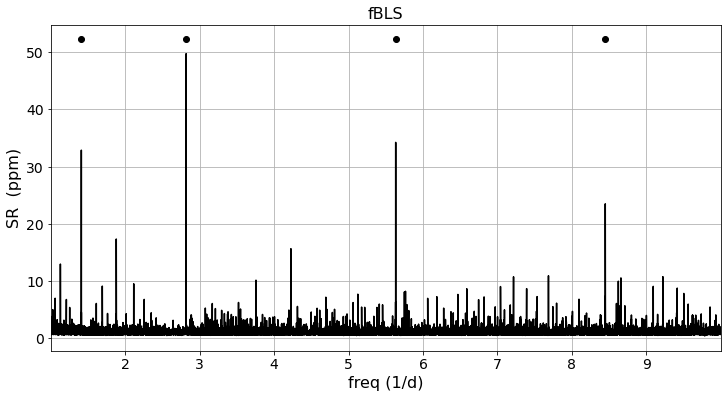

In [6]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})

hrm = np.array([1 / 4, 1 / 3, 1 / 2, 1, 2, 3, 4])
plt.plot(1 / p, Score*1e6, color='k')
plt.plot(1 / period * hrm,1.05*np.max(Score)*np.ones_like(hrm)*1e6, 'ok')
plt.xlim(np.min(1/p), np.max(1/p))
plt.title("fBLS", fontsize=16)
plt.ylabel('SR  (ppm)', fontsize=16)
plt.xlabel('freq (1/d)', fontsize=16)
plt.grid()

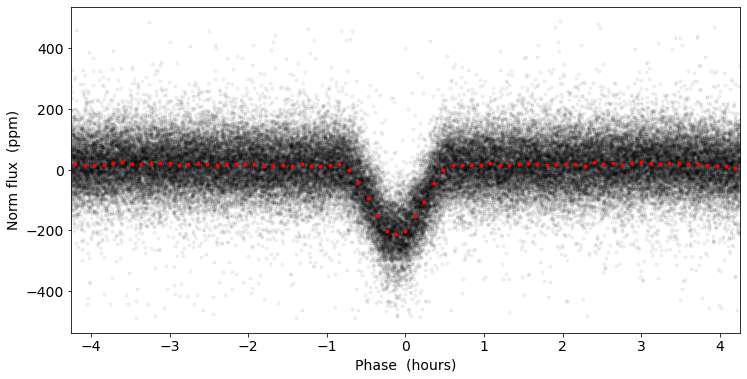

In [10]:
f = plt.figure(figsize=(12, 6))
plt.plot(lcf.time.value*24,(lcf.flux.value-1)*1e6,'.', color='k', alpha=0.05)
plt.errorbar(lcb.time.value*24,(lcb.flux.value-1)*1e6,yerr=lcb.flux_err.value*1e6, fmt='.r', elinewidth=1)
_ = plt.xlim([np.min(lcf.time.value*24),np.max(lcf.time.value*24)])
_ = plt.xlabel('Phase  (hours)',fontsize=14)
_ = plt.ylabel('Norm flux  (ppm)',fontsize=14)